# Incidence du syndrome grippal

In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
import isoweek 

In [2]:
raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/incidence-PAY-3.csv", skiprows=1)

In [3]:
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202106          3   23365   19231.0   27499.0      35        29.0   
1     202105          3   22426   18445.0   26407.0      34        28.0   
2     202104          3   25804   21491.0   30117.0      39        32.0   
3     202103          3   21810   17894.0   25726.0      33        27.0   
4     202102          3   17320   13906.0   20734.0      26        21.0   
5     202101          3   21799   17778.0   25820.0      33        27.0   
6     202053          3   21220   16498.0   25942.0      32        25.0   
7     202052          3   16428   12285.0   20571.0      25        19.0   
8     202051          3   21619   17370.0   25868.0      33        27.0   
9     202050          3   16845   13220.0   20470.0      26        20.0   
10    202049          3   12939    9923.0   15955.0      20        15.0   
11    202048          3   13804   10641.0   16967.0      21        16.0   
12    202047          3   19085   15285.0   22885.0      29        23.0   
13    202046          3   24801   20503.0   29099.0      38        31.0   
14    202045          3   42516   36857.0   48175.0      65        56.0   
15    202044          3   44567   38521.0   50613.0      68        59.0   
16    202043          3   43737   37523.0   49951.0      66        57.0   
17    202042          3   35145   29812.0   40478.0      53        45.0   
18    202041          3   27877   23206.0   32548.0      42        35.0   
19    202040          3   20443   16381.0   24505.0      31        25.0   
20    202039          3   19810   15900.0   23720.0      30        24.0   
21    202038          3   25562   21142.0   29982.0      39        32.0   
22    202037          3   18485   14649.0   22321.0      28        22.0   
23    202036          3   10390    7646.0   13134.0      16        12.0   
24    202035          3    9918    6842.0   12994.0      15        10.0   
25    202034          3    6084    3090.0    9078.0       9         4.0   
26    202033          3    6106    3411.0    8801.0       9         5.0   
27    202032          3    5918    3330.0    8506.0       9         5.0   
28    202031          3    4351    2269.0    6433.0       7         4.0   
29    202030          3    8179    5442.0   10916.0      12         8.0   
...      ...        ...     ...       ...       ...     ...         ...   
1864  198521          3   26096   19621.0   32571.0      47        35.0   
1865  198520          3   27896   20885.0   34907.0      51        38.0   
1866  198519          3   43154   32821.0   53487.0      78        59.0   
1867  198518          3   40555   29935.0   51175.0      74        55.0   
1868  198517          3   34053   24366.0   43740.0      62        44.0   
1869  198516          3   50362   36451.0   64273.0      91        66.0   
1870  198515          3   63881   45538.0   82224.0     116        83.0   
1871  198514          3  134545  114400.0  154690.0     244       207.0   
1872  198513          3  197206  176080.0  218332.0     357       319.0   
1873  198512          3  245240  223304.0  267176.0     445       405.0   
1874  198511          3  276205  252399.0  300011.0     501       458.0   
1875  198510          3  353231  326279.0  380183.0     640       591.0   
1876  198509          3  369895  341109.0  398681.0     670       618.0   
1877  198508          3  389886  359529.0  420243.0     707       652.0   
1878  198507          3  471852  432599.0  511105.0     855       784.0   
1879  198506          3  565825  518011.0  613639.0    1026       939.0   
1880  198505          3  637302  592795.0  681809.0    1155      1074.0   
1881  198504          3  424937  390794.0  459080.0     770       708.0   
1882  198503          3  213901  174689.0  253113.0     388       317.0   
1883  198502          3   97586   80949.0  114223.0     177       147.0   
1884  198501          3   85489   65918.0  105060.0     155       120.0   
1885  198452          3   84830  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1657  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1657        FR   France

Nous supprimon la ligne car pas de données

In [5]:
data = raw_data.dropna().copy()

In [6]:
data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202106          3   23365   19231.0   27499.0      35        29.0   
1     202105          3   22426   18445.0   26407.0      34        28.0   
2     202104          3   25804   21491.0   30117.0      39        32.0   
3     202103          3   21810   17894.0   25726.0      33        27.0   
4     202102          3   17320   13906.0   20734.0      26        21.0   
5     202101          3   21799   17778.0   25820.0      33        27.0   
6     202053          3   21220   16498.0   25942.0      32        25.0   
7     202052          3   16428   12285.0   20571.0      25        19.0   
8     202051          3   21619   17370.0   25868.0      33        27.0   
9     202050          3   16845   13220.0   20470.0      26        20.0   
10    202049          3   12939    9923.0   15955.0      20        15.0   
11    202048          3   13804   10641.0   16967.0      21        16.0   
12    202047          3   19085   15285.0   22885.0      29        23.0   
13    202046          3   24801   20503.0   29099.0      38        31.0   
14    202045          3   42516   36857.0   48175.0      65        56.0   
15    202044          3   44567   38521.0   50613.0      68        59.0   
16    202043          3   43737   37523.0   49951.0      66        57.0   
17    202042          3   35145   29812.0   40478.0      53        45.0   
18    202041          3   27877   23206.0   32548.0      42        35.0   
19    202040          3   20443   16381.0   24505.0      31        25.0   
20    202039          3   19810   15900.0   23720.0      30        24.0   
21    202038          3   25562   21142.0   29982.0      39        32.0   
22    202037          3   18485   14649.0   22321.0      28        22.0   
23    202036          3   10390    7646.0   13134.0      16        12.0   
24    202035          3    9918    6842.0   12994.0      15        10.0   
25    202034          3    6084    3090.0    9078.0       9         4.0   
26    202033          3    6106    3411.0    8801.0       9         5.0   
27    202032          3    5918    3330.0    8506.0       9         5.0   
28    202031          3    4351    2269.0    6433.0       7         4.0   
29    202030          3    8179    5442.0   10916.0      12         8.0   
...      ...        ...     ...       ...       ...     ...         ...   
1864  198521          3   26096   19621.0   32571.0      47        35.0   
1865  198520          3   27896   20885.0   34907.0      51        38.0   
1866  198519          3   43154   32821.0   53487.0      78        59.0   
1867  198518          3   40555   29935.0   51175.0      74        55.0   
1868  198517          3   34053   24366.0   43740.0      62        44.0   
1869  198516          3   50362   36451.0   64273.0      91        66.0   
1870  198515          3   63881   45538.0   82224.0     116        83.0   
1871  198514          3  134545  114400.0  154690.0     244       207.0   
1872  198513          3  197206  176080.0  218332.0     357       319.0   
1873  198512          3  245240  223304.0  267176.0     445       405.0   
1874  198511          3  276205  252399.0  300011.0     501       458.0   
1875  198510          3  353231  326279.0  380183.0     640       591.0   
1876  198509          3  369895  341109.0  398681.0     670       618.0   
1877  198508          3  389886  359529.0  420243.0     707       652.0   
1878  198507          3  471852  432599.0  511105.0     855       784.0   
1879  198506          3  565825  518011.0  613639.0    1026       939.0   
1880  198505          3  637302  592795.0  681809.0    1155      1074.0   
1881  198504          3  424937  390794.0  459080.0     770       708.0   
1882  198503          3  213901  174689.0  253113.0     388       317.0   
1883  198502          3   97586   80949.0  114223.0     177       147.0   
1884  198501          3   85489   65918.0  105060.0     155       120.0   
1885  198452          3   84830  

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0),'W')

In [8]:
data['period'] = [convert_week(yw) for yw in data['week']]

In [9]:
sorted_data = data.set_index('period').sort_index()

In [10]:
sorted_data

week  indicator     inc   inc_low    inc_up  inc100  \
period                                                                         
1984-10-29/1984-11-04  198444          3   68422   20056.0  116788.0     125   
1984-11-05/1984-11-11  198445          3  135223  101414.0  169032.0     246   
1984-11-12/1984-11-18  198446          3   87330   67686.0  106974.0     159   
1984-11-19/1984-11-25  198447          3   72029   54274.0   89784.0     131   
1984-11-26/1984-12-02  198448          3   78620   60634.0   96606.0     143   
1984-12-03/1984-12-09  198449          3  101073   81684.0  120462.0     184   
1984-12-10/1984-12-16  198450          3  123680  101401.0  145959.0     225   
1984-12-17/1984-12-23  198451          3  101726   80242.0  123210.0     185   
1984-12-24/1984-12-30  198452          3   84830   60602.0  109058.0     154   
1984-12-31/1985-01-06  198501          3   85489   65918.0  105060.0     155   
1985-01-07/1985-01-13  198502          3   97586   80949.0  114223.0     177   
1985-01-14/1985-01-20  198503          3  213901  174689.0  253113.0     388   
1985-01-21/1985-01-27  198504          3  424937  390794.0  459080.0     770   
1985-01-28/1985-02-03  198505          3  637302  592795.0  681809.0    1155   
1985-02-04/1985-02-10  198506          3  565825  518011.0  613639.0    1026   
1985-02-11/1985-02-17  198507          3  471852  432599.0  511105.0     855   
1985-02-18/1985-02-24  198508          3  389886  359529.0  420243.0     707   
1985-02-25/1985-03-03  198509          3  369895  341109.0  398681.0     670   
1985-03-04/1985-03-10  198510          3  353231  326279.0  380183.0     640   
1985-03-11/1985-03-17  198511          3  276205  252399.0  300011.0     501   
1985-03-18/1985-03-24  198512          3  245240  223304.0  267176.0     445   
1985-03-25/1985-03-31  198513          3  197206  176080.0  218332.0     357   
1985-04-01/1985-04-07  198514          3  134545  114400.0  154690.0     244   
1985-04-08/1985-04-14  198515          3   63881   45538.0   82224.0     116   
1985-04-15/1985-04-21  198516          3   50362   36451.0   64273.0      91   
1985-04-22/1985-04-28  198517          3   34053   24366.0   43740.0      62   
1985-04-29/1985-05-05  198518          3   40555   29935.0   51175.0      74   
1985-05-06/1985-05-12  198519          3   43154   32821.0   53487.0      78   
1985-05-13/1985-05-19  198520          3   27896   20885.0   34907.0      51   
1985-05-20/1985-05-26  198521          3   26096   19621.0   32571.0      47   
...                       ...        ...     ...       ...       ...     ...   
2020-07-20/2020-07-26  202030          3    8179    5442.0   10916.0      12   
2020-07-27/2020-08-02  202031          3    4351    2269.0    6433.0       7   
2020-08-03/2020-08-09  202032          3    5918    3330.0    8506.0       9   
2020-08-10/2020-08-16  202033          3    6106    3411.0    8801.0       9   
2020-08-17/2020-08-23  202034          3    6084    3090.0    9078.0       9   
2020-08-24/2020-08-30  202035          3    9918    6842.0   12994.0      15   
2020-08-31/2020-09-06  202036          3   10390    7646.0   13134.0      16   
2020-09-07/2020-09-13  202037          3   18485   14649.0   22321.0      28   
2020-09-14/2020-09-20  202038          3   25562   21142.0   29982.0      39   
2020-09-21/2020-09-27  202039          3   19810   15900.0   23720.0      30   
2020-09-28/2020-10-04  202040          3   20443   16381.0   24505.0      31   
2020-10-05/2020-10-11  202041          3   27877   23206.0   32548.0      42   
2020-10-12/2020-10-18  202042          3   35145   29812.0   40478.0      53   
2020-10-19/2020-10-25  202043          3   43737   37523.0   49951.0      66   
2020-10-26/2020-11-01  202044          3   44567   38521.0   50613.0      68   
2020-11-02/2020-11-08  202045          3   42516   36857.0   48175.0      65   
2020-11-09/2020-11-15  202046          3   24801   20503.0   29099.0      38   
2020-11-16/2020-11-22  20

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Cela correspond à la semaine 19 de l'année 1989

toute la colonne 'inc' est représantée par des chaines de caractères à a cause de trai en semain 19

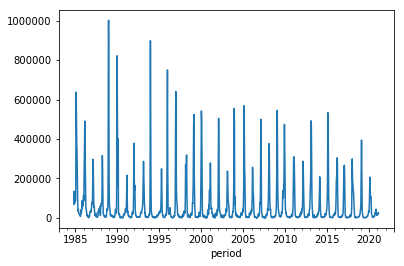

In [12]:
sorted_data['inc'].plot()

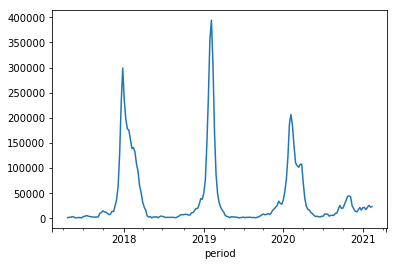

In [13]:
sorted_data['inc'][-200:].plot()

In [14]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985, 
                                    sorted_data.index[-1].year)]

In [16]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1], 
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

In [17]:
yearly_incidence = pd.Series(data=yearly_incidence, index=year) 

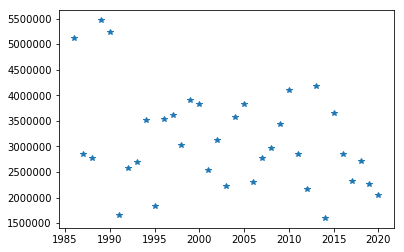

In [18]:
yearly_incidence.plot(style='*')

In [19]:
yearly_incidence.sort_values()

2014    1600941
1991    1659249
1995    1840410
2020    2042389
2012    2175217
2003    2234584
2019    2254386
2006    2307352
2017    2321583
2001    2529279
1992    2574578
1993    2703886
2018    2705325
1988    2765617
2007    2780164
1987    2855570
2016    2856393
2011    2857040
2008    2973918
1998    3034904
2002    3125418
2009    3444020
1994    3514763
1996    3539413
2004    3567744
1997    3620066
2015    3654892
2000    3826372
2005    3835025
1999    3908112
2010    4111392
2013    4182691
1986    5115251
1990    5235827
1989    5466192
dtype: int64

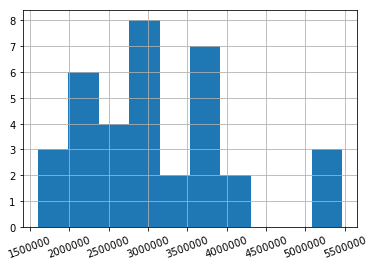

In [20]:
yearly_incidence.hist(xrot=20)